<a href="https://colab.research.google.com/github/tithihalder9/TithiHalder23-ML_Lab_Code/blob/main/Q9_Samples_cancer_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1 — Create dataset file
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = malignant, 1 = benign

# Save dataset as samples_cancer.csv
df.to_csv("samples_cancer.csv", index=False)
print("✅ Dataset created successfully — samples_cancer.csv")
print(df.shape)
df.head()


✅ Dataset created successfully — samples_cancer.csv
(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



=== SVM with LINEAR kernel ===
Accuracy: 0.9561
Recall: 0.9577
Precision: 0.9714
F1-Score: 0.9645
Jaccard Score: 0.9315
Error Rate: 0.0439
Confusion Matrix:
 [[41  2]
 [ 3 68]]

=== SVM with POLY kernel ===
Accuracy: 0.8684
Recall: 1.0000
Precision: 0.8256
F1-Score: 0.9045
Jaccard Score: 0.8256
Error Rate: 0.1316
Confusion Matrix:
 [[28 15]
 [ 0 71]]

=== SVM with RBF kernel ===
Accuracy: 0.9737
Recall: 0.9859
Precision: 0.9722
F1-Score: 0.9790
Jaccard Score: 0.9589
Error Rate: 0.0263
Confusion Matrix:
 [[41  2]
 [ 1 70]]

=== SVM with SIGMOID kernel ===
Accuracy: 0.9474
Recall: 0.9577
Precision: 0.9577
F1-Score: 0.9577
Jaccard Score: 0.9189
Error Rate: 0.0526
Confusion Matrix:
 [[40  3]
 [ 3 68]]


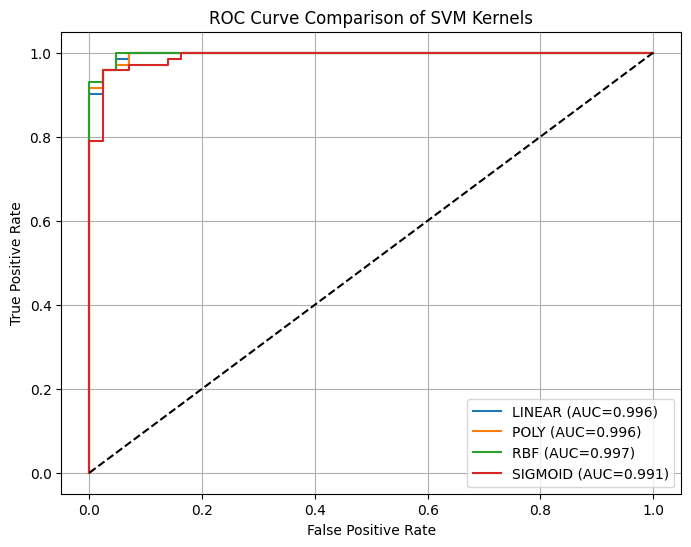

In [6]:
# Step 2 — SVM model comparison
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("samples_cancer.csv")

# Split features & target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

# Train & evaluate
for kernel in kernels:
    print(f"\n=== SVM with {kernel.upper()} kernel ===")
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    err_rate = 1 - acc
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    results[kernel] = {
        'accuracy': acc, 'recall': rec, 'precision': prec, 'f1_score': f1,
        'jaccard': jaccard, 'error_rate': err_rate, 'confusion_matrix': cm,
        'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Jaccard Score: {jaccard:.4f}")
    print(f"Error Rate: {err_rate:.4f}")
    print("Confusion Matrix:\n", cm)

# --- ROC Curve Comparison ---
plt.figure(figsize=(8,6))
for kernel in kernels:
    plt.plot(results[kernel]['fpr'], results[kernel]['tpr'],
             label=f"{kernel.upper()} (AUC={results[kernel]['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison of SVM Kernels")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
